In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
# import random

### Machine Learning

# transformation
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder

# models
from sklearn.model_selection import train_test_split

# metrics and evaluation
from scipy.stats import probplot

### Data Viz

# graphical basics
import matplotlib.pyplot as plt
%matplotlib inline

# graphical seaborn
import seaborn as sns

# # graphical plotly
# import plotly.graph_objects as go
# import plotly.express as px
# # for jupyter notebook display management
# import plotly.io as pio
# pio.renderers.default = "notebook"

In [4]:
df = pd.read_csv("C:/Users/elias/Downloads/comptage-velo-donnees-compteurs.csv" , sep =';')

In [5]:
df.head()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,Identifiant technique compteur,ID Photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-05-01T05:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-05
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-05-01T09:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-05
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-05-01T08:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-05
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-05-01T06:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-05
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-05-01T14:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-05


In [6]:
df.describe()

,Identifiant du site de comptage,Comptage horaire
count,8.883340e+05,921476.000000
mean,1.345994e+08,79.256685
std,7.560230e+07,108.152215
min,1.000031e+08,0.000000
25%,1.000475e+08,11.000000
50%,1.000560e+08,44.000000
75%,1.000563e+08,99.000000
max,3.000303e+08,3070.000000


In [7]:
# Convertir 'Date d\'installation du site de comptage' en datetime
df['Date d\'installation du site de comptage'] = pd.to_datetime(df['Date d\'installation du site de comptage'], errors='coerce')

# Gérer les coordonnées géographiques
df[['Latitude', 'Longitude']] = df['Coordonnées géographiques'].str.split(',', expand=True).astype(float)

# Traiter 'Comptage horaire' comme numérique pour les statistiques (si c'est bien une valeur)
# Si cette colonne est un simple index ou ID, les stats qui en découlent n'auront pas de sens de "trafic"
df['Comptage horaire'] = pd.to_numeric(df['Comptage horaire'])

In [8]:
if 'Date et heure du comptage' in df.columns:
    df['Date et heure du comptage'] = pd.to_datetime(df['Date et heure du comptage'], utc=True, errors='coerce')
    # Extraire des composants temporels
    df['Année'] = df['Date et heure du comptage'].dt.year
    df['Mois'] = df['Date et heure du comptage'].dt.month_name()
    df['Jour'] = df['Date et heure du comptage'].dt.day_name()
    df['Heure'] = df['Date et heure du comptage'].dt.hour
    df['Semaine'] = df['Date et heure du comptage'].dt.isocalendar().week.astype(int) # Numéro de la semaine de l'année
    df['Jour de la semaine Num'] = df['Date et heure du comptage'].dt.dayofweek # Lundi=0, Dimanche=6
else:
    print("La colonne 'Date et heure du comptage' est manquante. Certaines analyses temporelles ne seront pas possibles.")

La colonne 'Date et heure du comptage' est manquante. Certaines analyses temporelles ne seront pas possibles.


In [9]:
print("\n--- Statistiques descriptives du 'Comptage horaire' (si numérique) ---")
print(df['Comptage horaire'].describe())

print("\n--- Nombre d'enregistrements par site de comptage ---")
print(df['Nom du compteur'].value_counts())

print("\n--- Nombre d'enregistrements par identifiant de compteur ---")
print(df['Identifiant du compteur'].value_counts())

print("\n--- Nombre de sites de comptage uniques ---")
print(f"Nombre de Nom du compteur uniques: {df['Nom du compteur'].nunique()}")
print(f"Nombre de Identifiant du compteur uniques: {df['Identifiant du compteur'].nunique()}")


--- Statistiques descriptives du 'Comptage horaire' (si numérique) ---
count    921476.000000
mean         79.256685
std         108.152215
min           0.000000
25%          11.000000
50%          44.000000
75%          99.000000
max        3070.000000
Name: Comptage horaire, dtype: float64

--- Nombre d'enregistrements par site de comptage ---
Nom du compteur
106 avenue Denfert Rochereau NE-SO                                      9594
Face au 40 quai D'Issy SO-NE                                            9594
36 quai de Grenelle SO-NE                                               9594
36 quai de Grenelle NE-SO                                               9594
Pont Charles De Gaulle SO-NE                                            9594
                                                                        ... 
Quai des Tuileries Quai des Tuileries Vélos NO-SE                       2232
Face au 48 quai de la marne Face au 48 quai de la marne Vélos SO-NE     2232
Face au 48 quai de

In [10]:
# Configuration des styles de graphique
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 4.1. Distribution du nombre de cyclistes
plt.figure(figsize=(10, 6))
sns.histplot(df['Nombre de cyclistes'], bins=50, kde=True)
plt.title('Distribution du nombre de cyclistes')
plt.xlabel('Nombre de cyclistes')
plt.ylabel('Fréquence')
plt.show()

KeyError: 'Nombre de cyclistes'

<Figure size 1200x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
print("\n--- Statistiques descriptives du 'Comptage horaire' (si numérique) ---")
print(df['Comptage horaire'].describe())

print("\n--- Nombre d'enregistrements par site de comptage ---")
print(df['Nom du compteur'].value_counts())

print("\n--- Nombre d'enregistrements par identifiant de compteur ---")
print(df['Identifiant du compteur'].value_counts())

print("\n--- Nombre de sites de comptage uniques ---")
print(f"Nombre de Nom du compteur uniques: {df['Nom du compteur'].nunique()}")
print(f"Nombre de Identifiant du compteur uniques: {df['Identifiant du compteur'].nunique()}")


--- Statistiques descriptives du 'Comptage horaire' (si numérique) ---
count    921476.000000
mean         79.256685
std         108.152215
min           0.000000
25%          11.000000
50%          44.000000
75%          99.000000
max        3070.000000
Name: Comptage horaire, dtype: float64

--- Nombre d'enregistrements par site de comptage ---
Nom du compteur
106 avenue Denfert Rochereau NE-SO                                      9594
Face au 40 quai D'Issy SO-NE                                            9594
36 quai de Grenelle SO-NE                                               9594
36 quai de Grenelle NE-SO                                               9594
Pont Charles De Gaulle SO-NE                                            9594
                                                                        ... 
Quai des Tuileries Quai des Tuileries Vélos NO-SE                       2232
Face au 48 quai de la marne Face au 48 quai de la marne Vélos SO-NE     2232
Face au 48 quai de

In [ ]:
try:
    plt.figure(figsize=(12, 8))
    top_sites = df.groupby('Nom du compteur')['Nombre de cyclistes'].sum().nlargest(15).index
    sns.barplot(x='Nombre de cyclistes', y='Nom du compteur', data=df[df['Nom du compteur'].isin(top_sites)].groupby('Nom du compteur')['Nombre de cyclistes'].sum().reset_index().sort_values(by='Nombre de cyclistes', ascending=False))
    plt.title('Trafic cycliste total par site de comptage (Top 15)')
    plt.xlabel('Nombre total de cyclistes')
    plt.ylabel('Nom du site de comptage')
    plt.show() 

SyntaxError: incomplete input (1932144879.py, line 8)

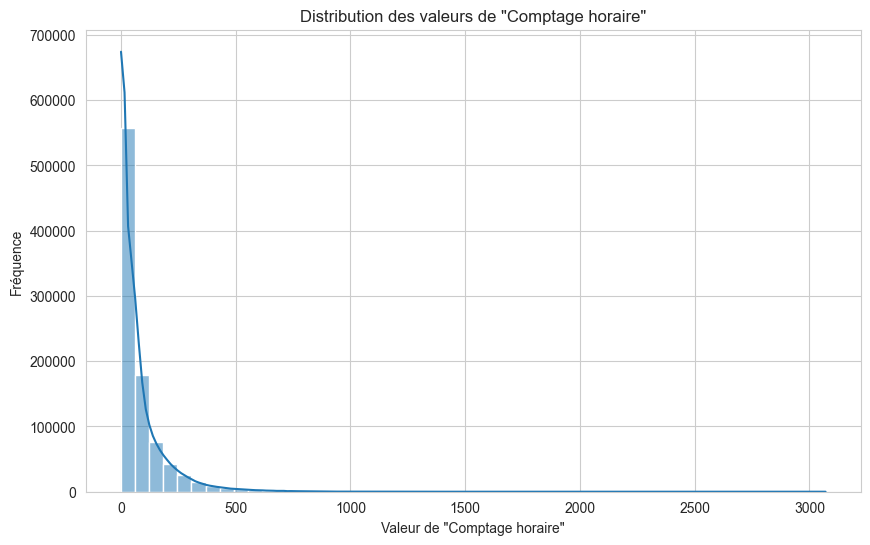

In [ ]:
# 4.1. Distribution du nombre d'enregistrements ('Comptage horaire' si numérique)
plt.figure(figsize=(10, 6))
sns.histplot(df['Comptage horaire'], bins=50, kde=True)
plt.title('Distribution des valeurs de "Comptage horaire"')
plt.xlabel('Valeur de "Comptage horaire"')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
df['Heure'].value_counts().sort_index().plot(kind='bar')
plt.title('Fréquence des enregistrements par heure de la journée')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre d\'enregistrements')
plt.xticks(rotation=0)
plt.show()


KeyError: 'Heure'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Jour_Ordonne'] = pd.Categorical(df['Jour'], categories=jours_ordre, ordered=True)
df['Jour_Ordonne'].value_counts().sort_index().plot(kind='bar')
plt.title('Fréquence des enregistrements par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre d\'enregistrements')
plt.show()

KeyError: 'Jour'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
mois_ordre = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Mois_Ordonne'] = pd.Categorical(df['Mois'], categories=mois_ordre, ordered=True)
df['Mois_Ordonne'].value_counts().sort_index().plot(kind='bar')
plt.title('Fréquence des enregistrements par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'enregistrements')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Mois'

<Figure size 1200x600 with 0 Axes>

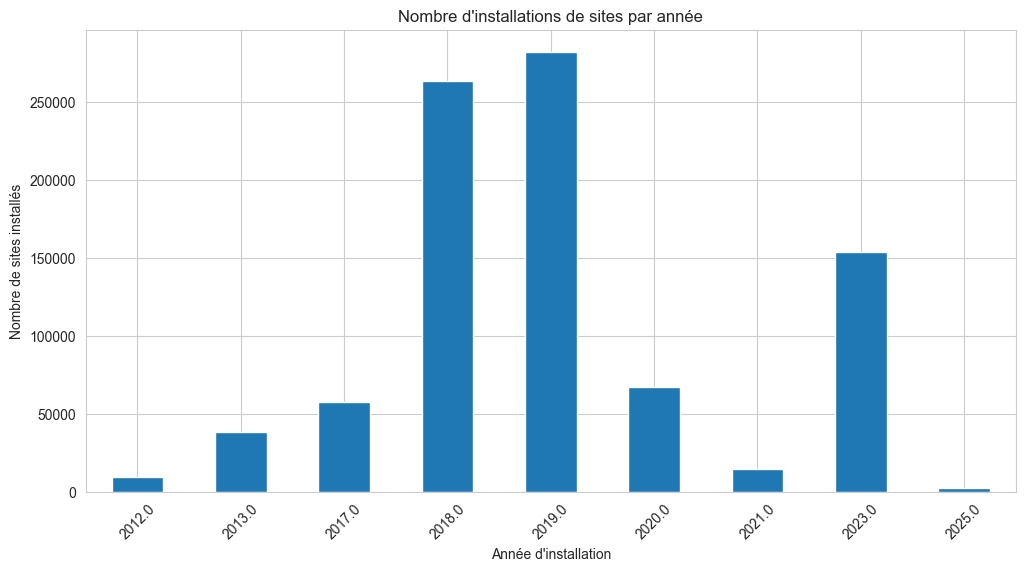

In [ ]:
plt.figure(figsize=(12, 6))
df['Date d\'installation du site de comptage'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Nombre d\'installations de sites par année')
plt.xlabel('Année d\'installation')
plt.ylabel('Nombre de sites installés')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
df.set_index('Date et heure du comptage').resample('D').size().plot()
plt.title('Nombre d\'enregistrements par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'enregistrements')
plt.show()

KeyError: "None of ['Date et heure du comptage'] are in the columns"

<Figure size 1500x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
pivot_table_freq = df.pivot_table(index='Heure', columns='Jour de la semaine Num', aggfunc='size', fill_value=0)
pivot_table_freq.columns = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
sns.heatmap(pivot_table_freq, cmap='viridis', annot=True, fmt=".0f")
plt.title('Fréquence des enregistrements par heure et jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Heure de la journée')
plt.show()

NameError: name 'plt' is not defined